In [331]:
import os
import subprocess
import time
import numpy as np
from scipy.stats import wilcoxon, ttest_rel, linregress
import matplotlib.pyplot as plt

%matplotlib inline


INSTANCES_DIR = "instances/"
RESULTS_DIR = "results/"

def run_instance(infile, args, outfile=None):
    start = time.time()
    if not outfile:
        outfile = subprocess.PIPE
    else:
        outfile = open(RESULTS_DIR + outfile, "a")
    subprocess.call(["./lsscp", "--instance", INSTANCES_DIR + infile, *args], stdout=outfile)
    return time.time() - start
        
def run(args, resultfile):
    try:
        os.remove(RESULTS_DIR + resultfile)
    except FileNotFoundError:
        pass
    elapsed_time = 0
    for dir, dirs, files in os.walk(INSTANCES_DIR):
        for file in sorted(files):
            elapsed_time += run_instance(file, args, resultfile)
    return elapsed_time

def parse(file):
    with open(file) as f:
        return list(map(int, f.readlines()))
    
def load_results():
    for dir, dirs, files in os.walk(RESULTS_DIR):
        for file in files:
            name = file[:-4].replace("-", "_")
            globals()[name] = parse(dir + file)
        
def percentage_deviation(observed, best):    
    assert(len(observed) == len(best))
    return list(map(lambda x: (x[0] - x[1])/x[1], zip(observed, best)))

def average_percentage_deviation(observed, best):
    pd = percentage_deviation(observed, best)
    return sum(pd)/len(pd)

def relative_percentage_deviation(l1, l2):
    assert(len(l1) == len(l2))
    return list(map(lambda x: abs((x[0] - x[1])/((x[1] + x[0])/2)), zip(l1, l2)))

def fraction_positive(l):
    return len(list(filter(lambda x: x > 0, l)))/len(l)

def test_improvement(l1, l2):
    imp = percentage_deviation(l1, l2)
    print("Fraction of instances improved : ", fraction_positive(imp))
    imp = np.array(imp)
    print(imp.mean())
    print(imp.std())
    print(imp.max())
    print(imp.min())
    print(wilcoxon(l1, l2))
    print(ttest_rel(l1, l2))


In [327]:
print(run(("--ch1",), "ch1.txt"))
print(run(("--ch2",), "ch2.txt"))
print(run(("--ch3",), "ch3.txt"))
print(run(("--ch4",), "ch4.txt"))
print(run(("--ch1", "--re"), "ch1re.txt"))
print(run(("--ch2", "--re"), "ch2re.txt"))
print(run(("--ch3", "--re"), "ch3re.txt"))
print(run(("--ch4", "--re"), "ch4re.txt"))

2.9387271404266357
2.6017112731933594
2.963225841522217
1.7277860641479492
3.0678021907806396
2.0156350135803223
1.9279801845550537
1.8477263450622559


In [328]:
load_results()

In [329]:
print(average_percentage_deviation(ch1, best_known))
print(average_percentage_deviation(ch2, best_known))
print(average_percentage_deviation(ch3, best_known))
print(average_percentage_deviation(ch4, best_known))
print(average_percentage_deviation(ch1re, best_known))
print(average_percentage_deviation(ch2re, best_known))
print(average_percentage_deviation(ch3re, best_known))
print(average_percentage_deviation(ch4re, best_known))

35.29621653608673
0.27405351611183165
0.3016417317840776
0.3330589049742115
27.81905654265422
0.11592208166847057
0.14073851429349368
0.16536432977731683


In [269]:
nore = ch1 + ch2 + ch3 + ch4
withre = ch1re + ch2re + ch3re + ch4re
test_improvement(nore, withre)

Fraction of instances improved :  1.0
0.174084826286
0.0846436205028
0.470588235294
0.0278884462151
WilcoxonResult(statistic=0.0, pvalue=1.952613547575738e-42)
Ttest_relResult(statistic=8.8120414349883358, pvalue=2.2301312111288087e-16)


In [239]:

print(run(("--ch1", "--fi"), "ch1fi.txt"))
print(run(("--ch4", "--fi"), "ch4fi.txt"))
print(run(("--ch1", "--re", "--fi"), "ch1refi.txt"))
print(run(("--ch4", "--re", "--fi"), "ch4refi.txt"))
print(run(("--ch1", "--bi"), "ch1bi.txt"))
print(run(("--ch4", "--bi"), "ch4bi.txt"))
print(run(("--ch1", "--re", "--bi"), "ch1rebi.txt"))
print(run(("--ch4", "--re", "--bi"), "ch4rebi.txt"))

3.4966604709625244
1.778838872909546
3.385441541671753
1.8022000789642334
3.6401631832122803
2.4824776649475098
3.4785714149475098
2.1651549339294434


In [245]:
load_results()

In [248]:
print(average_percentage_deviation(ch1fi, best_known))
print(average_percentage_deviation(ch1refi, best_known))
print(average_percentage_deviation(ch4fi, best_known))
print(average_percentage_deviation(ch4refi, best_known))
print(average_percentage_deviation(ch1bi, best_known))
print(average_percentage_deviation(ch1rebi, best_known))
print(average_percentage_deviation(ch4bi, best_known))
print(average_percentage_deviation(ch4rebi, best_known))

26.474822204359842
27.54606859508961
0.16375907064262793
0.16037146995445006
0.3544643065424688
26.941379997032307
0.13425094055529635
0.13138162394302738


In [271]:
nothing = ch1 + ch1re + ch4 + ch4re
withfi = ch1fi + ch1refi + ch4fi + ch4refi
withbi = ch1bi + ch1rebi + ch4bi + ch4rebi
test_improvement(nothing, withfi)
test_improvement(nothing, withbi)

Fraction of instances improved :  0.6451612903225806
0.117231956842
0.133160092
0.715223097113
0.0
WilcoxonResult(statistic=0.0, pvalue=5.2249055180938445e-28)
Ttest_relResult(statistic=8.811052031669611, pvalue=2.2451587721065371e-16)
Fraction of instances improved :  0.7338709677419355
7.53598162079
16.4874496356
73.4262295082
-0.0126582278481
WilcoxonResult(statistic=3.0, pvalue=9.222860416103311e-32)
Ttest_relResult(statistic=8.7751920585564775, pvalue=2.8631737687536462e-16)


In [295]:
print(run(("--ig",), "ig.txt"))
print(run(("--gen",), "gen.txt"))

43.217150926589966
2759.2181079387665


In [296]:
load_results()

In [306]:
print(average_percentage_deviation(ig, best_known))
print(average_percentage_deviation(gen, best_known))

0.10898244044909508
0.06491580206950022


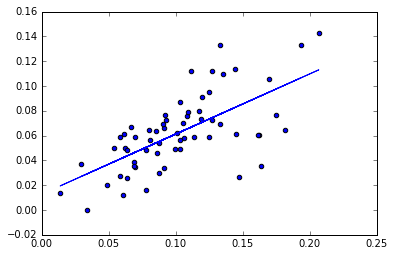

In [315]:
#plt.scatter(ig, best_known)
#plt.show()
#plt.scatter(gen, best_known)
#plt.show()
pderiv_ig = relative_percentage_deviation(ig, best_known)
pderiv_gen = relative_percentage_deviation(gen, best_known)
correlation = linregress(pderiv_ig, pderiv_gen)
plt.plot(pderiv_ig, np.array(pderiv_ig) * correlation.slope + correlation.intercept)
plt.scatter(pderiv_ig, pderiv_gen)
plt.show()

In [319]:
print(wilcoxon(pderiv_ig, pderiv_gen))
print(ttest_rel(pderiv_ig, pderiv_gen))
print(wilcoxon(ig, best_known))
print(wilcoxon(gen, best_known))

WilcoxonResult(statistic=2.0, pvalue=8.4121783010067297e-11)
Ttest_relResult(statistic=10.159733801527834, pvalue=9.6914945832914006e-15)
WilcoxonResult(statistic=0.0, pvalue=7.5023880659126726e-12)
WilcoxonResult(statistic=0.0, pvalue=1.0910892918353302e-11)


In [452]:
def mean_run_time(infile, args):
    total = 0
    for i in range(25):
        total += run_instance(infile, args)
    return total/25

def run_optimal(infile, algo, outfile, ratio):
    mean_fi_time = mean_run_time(infile, ("--ch4", "--fi"))
    try:
        os.remove(RESULTS_DIR + outfile)
    except FileNotFoundError:
        pass
    return run_instance(infile, (algo, "--t", str(int(mean_fi_time * 1000 * ratio))), outfile)

optimal_instances = ["scpa1", "scpb1", "scpc1", "scpd1"]

def run_all_optimal(algo):
    for instance in optimal_instances:
        print(run_optimal(instance + ".txt", "--" + algo, instance + "_" + algo + "_opt.txt", 1000))
    load_results()

19.00484299659729
13.006156206130981
19.02070665359497
18.004141330718994
[257]
[74]
[238]
[61]

In [447]:
run_all_optimal("gen")
print(scpa1_gen_opt) # A.1 253 -> 258 -> 255
print(scpb1_gen_opt) # B.1 69 -> 71 -> 70
print(scpc1_gen_opt) # C.1 227 -> 231 -> 229
print(scpd1_gen_opt) # D.1 60 -> 61 -> 60

16.015981912612915
13.006069421768188
19.01896047592163
18.006484985351562
[257]
[69]
[232]
[61]


In [454]:
run_all_optimal("ig")
print(scpa1_ig_opt) # A.1 253 -> 258 -> 255
print(scpb1_ig_opt) # B.1 69 -> 71 -> 70
print(scpc1_ig_opt) # C.1 227 -> 231 -> 229
print(scpd1_ig_opt) # D.1 60 -> 61 -> 60

17.008739471435547
15.004058122634888
19.00605273246765
22.0093994140625
[267]
[77]
[242]
[65]
